# Macroeconomic analysis - figures and vizualization
* Responsible: Joakim Blix Prestmo
* Contributor: Haakon Trønnes
* Data sources: Statistics Norway, ECB, NAV, FED, Norges Bank mv. 
* Last update: 28th april 2021



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import pandas_datareader.data as web

pd.options.display.max_columns=250
pd.options.display.max_rows=250

## Changes
* No recent changes

In [2]:
sns.__version__, pd.__version__

('0.11.0', '1.1.3')

In [3]:
fixedprices = "2019-priser"
lastquarter = "2020Q4"

<h2>National accounts</h2>
Source: Statitics Norway

In [65]:
# Nasjonalregnskapet, faste priser, ses just og ujustert
# dfses = pd.read_csv('http://data.ssb.no/api/v0/dataset/59022.csv?lang=no', encoding = 'latin1', na_values = '..', sep=";")
# dfses  = dfses[dfses["statistikkvariabel"]=="Faste 2018-priser, sesongjustert (mill. kr)"]
# dfses.drop('statistikkvariabel',1, inplace=True)
# dfses['kvartal'] =pd.Series(dfses['kvartal']).str.replace('K', 'Q')
# pd.to_datetime(dfses['kvartal'])
# # 
# dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = '09190: Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')

# dfses.columns = [dfses.columns.str.split(' ')[i][0] for i in range(len(dfses.columns))]
# kolonnenavn = list(dfses.columns.values)



In [11]:
url = 'https://www.ssb.no/statbank/sq/10035447'

dfmnd = pd.read_excel(url, skiprows=3, skipfooter=50)




In [12]:
dfmnd.tail()


,Unnamed: 0,Konsum i husholdninger og ideelle organisasjoner,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,Konsum i offentlig forvaltning,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,¬ Utvinning og rørtransport (bruttoinvestering),¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),¬¬¬ Næringer (bruttoinvestering),¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi",Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
57,2020M10,122168,116069,61376,55001,804,-1112,6100,72971,36001,31645,4356,36970,70834,13471,152,57211,40372,24891,141,15535,3505,5711,15481,16839,5,6517,77355,272495,252350,89810,114007,36811,50578,100,26519,386502,88392,60324,2339,2769,22960,298110,249224,48885,215956,160675,18533,30972,111170,55280,33269
58,2020M11,120932,114906,62829,52831,518,-1272,6026,73352,36103,31714,4389,37249,70884,13321,1122,56441,39898,24390,145,15085,3536,5624,15508,16543,4,13153,84040,278324,250725,89894,110830,35278,48765,101,26685,389154,90727,64140,1519,2543,22525,298427,247343,51085,214270,158616,18785,29479,110351,55654,33073
59,2020M12,120665,114761,62010,52961,709,-919,5904,74109,36386,32006,4379,37724,72363,14064,17,58282,41407,25419,147,15761,3687,5824,15988,16876,8,5155,77526,272300,253057,90985,116257,37565,51736,585,26370,388557,85531,59334,1364,1817,23016,303027,250346,52680,216813,160535,18843,30979,110713,56278,33534
60,2021M01,117377,111763,60453,51678,719,-1087,5614,72971,35982,31541,4441,36989,70540,13520,323,56697,39706,24598,189,14149,4117,6144,15108,16990,3,11416,81959,272307,247045,89961,112104,36674,47689,119,27622,384411,84016,57043,2119,1705,23149,300396,248273,52122,216039,160271,19202,31207,109862,55769,32234
61,2021M02,117085,111607,60587,51242,360,-583,5479,72861,35911,31459,4451,36951,71320,13086,1341,56893,40488,25053,199,14390,4102,6362,15435,16405,5,8856,80182,270128,246840,89266,112171,36420,47792,721,27238,382299,83989,57714,878,2284,23114,298310,246935,51375,214654,158947,18835,30570,109542,55706,32281


In [13]:
dfmnd.rename(columns={'Unnamed: 0':'Date', 'Konsum i husholdninger og ideelle organisasjoner': 'HouseholdConsumption', 'Konsum i offentlig forvaltning': 'PublicConsumption',
                     '¬¬¬ Næringer (bruttoinvestering)':'IndustryInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OilInvest', 
                     'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'GDPMainland'}, inplace=True)

# dfmnd.drop(['Dato'], axis=1, inplace=True)
dfmnd.index=dfmnd['Date']
dfmnd.drop(['Date'], axis=1, inplace=True)



In [6]:
# dfmnd.rename(columns={'Unnamed: 0':'Dato', 'Konsum i husholdninger og ideelle organisasjoner': 'HushKonsum', 'Konsum i offentlig forvaltning': 'OffKonsum',
#                      '¬¬¬ Næringer (bruttoinvestering)':'NaearingsInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OljeInvest', 
#                      'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'BNPFN'}, inplace=True)
# dfmnd.drop(['Dato'], axis=1, inplace=True)

In [7]:
# dfses.tail()
dfmnd.tail()

,HouseholdConsumptin,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,PublicConsumption,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,OilInvest,¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),IndustryInvest,¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi",GDPMainland,Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020M10,122168,116069,61376,55001,804,-1112,6100,72971,36001,31645,4356,36970,70834,13471,152,57211,40372,24891,141,15535,3505,5711,15481,16839,5,6517,77355,272495,252350,89810,114007,36811,50578,100,26519,386502,88392,60324,2339,2769,22960,298110,249224,48885,215956,160675,18533,30972,111170,55280,33269
2020M11,120932,114906,62829,52831,518,-1272,6026,73352,36103,31714,4389,37249,70884,13321,1122,56441,39898,24390,145,15085,3536,5624,15508,16543,4,13153,84040,278324,250725,89894,110830,35278,48765,101,26685,389154,90727,64140,1519,2543,22525,298427,247343,51085,214270,158616,18785,29479,110351,55654,33073
2020M12,120665,114761,62010,52961,709,-919,5904,74109,36386,32006,4379,37724,72363,14064,17,58282,41407,25419,147,15761,3687,5824,15988,16876,8,5155,77526,272300,253057,90985,116257,37565,51736,585,26370,388557,85531,59334,1364,1817,23016,303027,250346,52680,216813,160535,18843,30979,110713,56278,33534
2021M01,117377,111763,60453,51678,719,-1087,5614,72971,35982,31541,4441,36989,70540,13520,323,56697,39706,24598,189,14149,4117,6144,15108,16990,3,11416,81959,272307,247045,89961,112104,36674,47689,119,27622,384411,84016,57043,2119,1705,23149,300396,248273,52122,216039,160271,19202,31207,109862,55769,32234
2021M02,117085,111607,60587,51242,360,-583,5479,72861,35911,31459,4451,36951,71320,13086,1341,56893,40488,25053,199,14390,4102,6362,15435,16405,5,8856,80182,270128,246840,89266,112171,36420,47792,721,27238,382299,83989,57714,878,2284,23114,298310,246935,51375,214654,158947,18835,30570,109542,55706,32281


In [7]:
# pd.date_range(start='1/1/2000', end='30/09/2019', freq='Q')

In [64]:
# dfses.tail()

In [10]:
# date_rng
#  https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [66]:
# dfses['bnpb.nr23_9fn'].tail()

# dfses['log_BNP'] = np.log(dfses['bnpb.nr23_9fn'])
# dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=7, center=True).mean()
# dfses['Dlog_BNP'] = (dfses['log_BNP']).diff()
# dfses['D4log_BNP'] = dfses['log_BNP'].diff(4)
# dfses['DBNP-trend'] = dfses['Dlog_BNP']['1998K1':sistekvartal].mean()
# dfses['GDlog_BNP'] = dfses['Dlog_BNP'].rolling(window=7, center=True).mean()
# dfses['BNP-gap'] = (dfses['GDlog_BNP']/dfses['DBNP-trend']-1)

# # dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=25).mean()



In [67]:
# import pickle
# dfses.to_pickle('../dfses.pkl')
# # dfses = pd.read_pickle('../dfses.pkl')

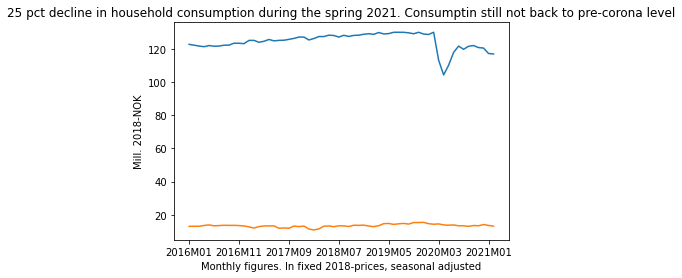

In [15]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['HouseholdConsumption']/1000).plot()
(dfmnd['OilInvest']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('25 pct decline in household consumption during the spring 2021. Consumptin still not back to pre-corona level')
# plt.rc('text', usetex=True)
plt.ylabel('Mill. 2018-NOK')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
plt.savefig('../Figurer/Makro/konsumMnd.png')
plt.show()

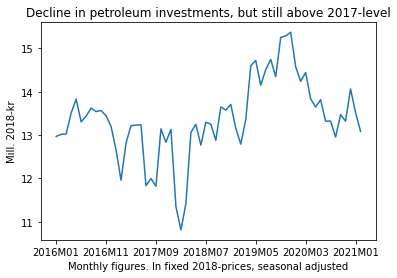

In [69]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['OilInvest']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('Decline in petroleum investments, but still above 2017-level')
# plt.rc('text', usetex=True)
plt.ylabel('Mill. 2018-kr')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
plt.savefig('../Figurer/Makro/oljeInvestMnd.png')
plt.show()

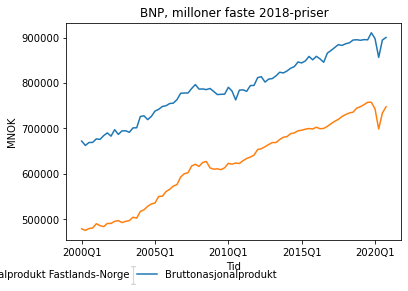

In [18]:
# 1.12 BNP sesjustert
#['2008K2':'2017K3']
plt.clf()
dfses['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt')
dfses['bnpb.nr23_9fn'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
# dfses['Glog_BNP'].plot()
# dfses['log_BNP'].plot()

plt.title('BNP, milloner faste '+fastepriser)
plt.ylabel('MNOK')
plt.xlabel("Tid")

plt.legend(bbox_to_anchor=(0.2, -0.2), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
plt.savefig('1.12 BNP.png')
plt.show()

#,bbox_inches="tight"

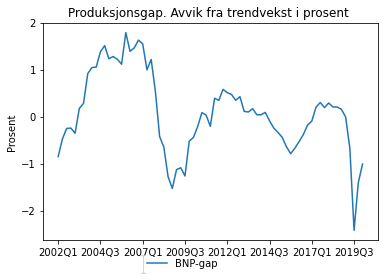

In [19]:


# 1.13 BNP sesjustert vekst

#dfses['Dlog_BNP']['2008K2':'2017K3'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
#dfses['GDlog_BNP']['2008K2':'2017K3'].plot(label='Trendvekst')
dfses['BNP-gap']['2002Q1':sistekvartal].plot(label='BNP-gap')
plt.title('Produksjonsgap. Avvik fra trendvekst i prosent ')
plt.ylabel('Prosent')
plt.xlabel('')
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
#plt.legend()
plt.savefig('../Figurer/Makro/1.13 BNP-gap.png')
plt.show()




In [20]:
# kolonnenavn

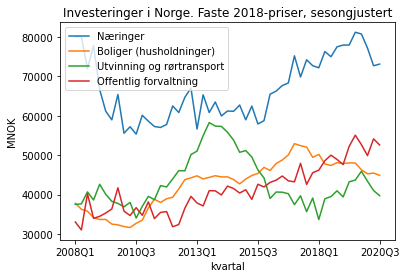

In [21]:
plt.clf()

#1.22 Investering
dfses['bif.nr83naer']['2008K2':sistekvartal].plot(label = 'Næringer')
dfses['bif.nr8368']['2008K2':sistekvartal].plot(label = 'Boliger (husholdninger)')
dfses['bif.nr83oljroer']['2008K2':sistekvartal].plot(label = 'Utvinning og rørtransport')
# dfses['bif.nr83indberg']['2008K2':sistekvartal].plot(label = 'Industri') 
# dfses['bif.nr83rest']['2008K2':sistekvartal].plot(label = 'Andre tjenester') 
# dfses['bif.nr83vare']['2008K2':sistekvartal].plot(label = 'Annen vareproduksjon') 
dfses['bif.nr84_5']['2008K2':sistekvartal].plot(label = 'Offentlig forvaltning')
plt.title('Investeringer i Norge. Faste '+fastepriser+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()
plt.savefig('../Figurer/Makro/1.22 Investering.png')

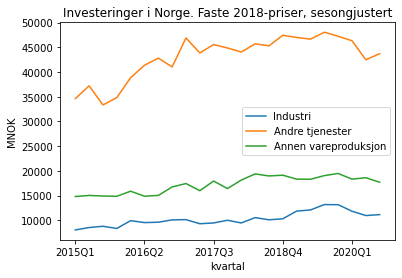

In [22]:
plt.clf()

#1.23 Andre investering
dfses['bif.nr83indberg']['2015K1':sistekvartal].plot(label = 'Industri') 
dfses['bif.nr83rest']['2015K1':sistekvartal].plot(label = 'Andre tjenester') 
dfses['bif.nr83vare']['2015K1':sistekvartal].plot(label = 'Annen vareproduksjon') 
plt.title('Investeringer i Norge. Faste '+fastepriser+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()
plt.savefig('../Figurer/Makro/1.23 Andre ivestering.png')

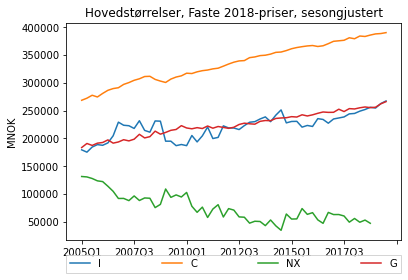

In [23]:
plt.clf()
#1.31 økosirk
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
plt.clf()
dfses['bif.nr8_']['2005K3':'2019Q3'].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
dfses['koh.nrpriv']['2005K3':'2019Q3'].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
(dfses['eks.nrtot']['2005K3':'2019Q3']-dfses['imp.nrtot']['2005K3':'2019K1']).plot(label = 'NX')#(label = 'Eksport i alt')
dfses['makrok.nreoff']['2005K3':'2019Q3'].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('MNOK')
plt.xlabel('')
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
           ncol=4, mode="expand", borderaxespad=0., fancybox=False )
plt.title("Hovedstørrelser, Faste "+fastepriser+", sesongjustert")
plt.savefig('1.31 Økosirk.png')


In [24]:
# vekst fra forrige kvartal
DI = np.log(dfses['bif.nr8_']).diff()*100
DC = np.log(dfses['koh.nrpriv']).diff()*100
DX = np.log(dfses['eks.nrtot']).diff()*100
DNX = np.log(dfses['eks.nrtot']-dfses['imp.nrtot']+5000).diff()
D4G = np.log(dfses['makrok.nreoff']).diff(4)*25
D4I = np.log(dfses['bif.nr8_']).diff(4)*25
D4C = np.log(dfses['koh.nrpriv']).diff(4)*25

I_index = dfses['bif.nr8_']/dfses['bif.nr8_']['2017Q1']
C_index = dfses['koh.nrpriv']/dfses['koh.nrpriv']['2017Q1']
NX_index = (dfses['eks.nrtot']-dfses['imp.nrtot'])/(dfses['eks.nrtot']['2017Q1']-dfses['imp.nrtot']['2017Q1'])
G_index = dfses['makrok.nreoff']/dfses['makrok.nreoff']['2017Q1']
X_index = dfses['eks.nrtot']/dfses['eks.nrtot']['2017Q1']



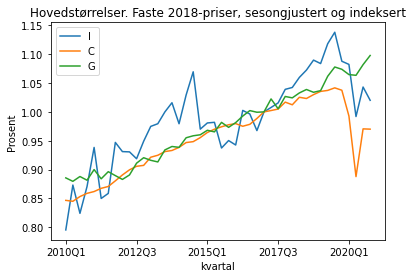

In [25]:
#1.32 økosirk - indeksert
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
I_index['2010Q1':].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
C_index['2010Q':].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# X_index['2010Q':].plot(label = 'X')#(label = 'Eksport i alt')
# NX_index['2010Q':].plot(label = 'NX')#(label = 'Eksport i alt')
G_index['2010K1':].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.title('Hovedstørrelser. Faste '+fastepriser+', sesongjustert og indeksert')
plt.legend()
plt.savefig('1.32 Økosirk.png')


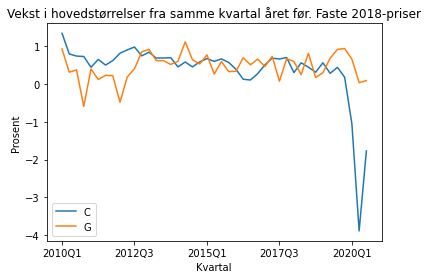

In [26]:
plt.clf()
#1.32 økosirk - vekst
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
# D4I['2012Q1':sistekvartal].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
D4C['2010Q1':sistekvartal].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# DNX['2010K1':sistekvartal].plot(label = 'NX')#(label = 'Eksport i alt')
D4G['2010Q1':sistekvartal].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Vekst i hovedstørrelser fra samme kvartal året før. Faste '+fastepriser+'')
plt.legend()
plt.savefig('../Figurer/Makro/1.32 Økosirk vekst.png')


In [27]:
plt.clf()

#1 makrodata fra nasjonalregnskapet
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/59012.csv?lang=en', encoding = 'latin1', na_values = '..')
df = df[df['contents'] == 'Current prices, seasonally adjusted (NOK million)']
df.drop('contents',1, inplace =True)
df = df.pivot(index = 'quarter',columns = 'macroeconomic indicator', values = '09190: Final expenditure and gross domestic product, by macroeconomic indicator, contents and quarter')
df.columns = [df.columns.str.split(' ')[i][0] for i in range(len(df.columns))]

df.head()

,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
quarter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000K1,3331.0,11613.0,77899.0,57196.0,44682.0,6211.0,33069.0,14891.0,18780.0,4748.0,12514.0,81845.0,5812.0,3946.0,27.0,237286.0,180710.0,360266.0,280357.0,33144.0,79909.0,121741.0,25825.0,56576.0,43071.0,1901.0,36157.0,157495.0,46386.0,73051.0,10729.0,32848.0,107539.0,62627.0,1336.0,6858.0,-4410.0,151804.0,66196.0,83160.0,158146.0,6342.0,6970.0,27528.0,20558.0,42766.0,70294.0,285636.0,82808.0,310311.0,467779.0
2000K2,337.0,11635.0,76499.0,55735.0,42280.0,6158.0,30646.0,14492.0,19200.0,4952.0,13455.0,82997.0,6272.0,6498.0,27.0,238842.0,183129.0,368662.0,283439.0,34011.0,85222.0,122538.0,26580.0,55713.0,44597.0,2227.0,39567.0,164129.0,49060.0,73275.0,7642.0,34938.0,108862.0,65119.0,1162.0,7176.0,-4566.0,153496.0,67066.0,83820.0,160050.0,6553.0,6958.0,27798.0,20840.0,42524.0,70321.0,286107.0,83776.0,313395.0,477497.0
2000K3,328.0,12010.0,72631.0,54656.0,41757.0,5823.0,29747.0,13824.0,18806.0,4791.0,12899.0,81777.0,4151.0,9147.0,27.0,242973.0,185392.0,383176.0,287612.0,34634.0,95564.0,125518.0,25239.0,57581.0,44639.0,3663.0,40338.0,178007.0,49880.0,84126.0,6766.0,34220.0,109273.0,66484.0,1804.0,6743.0,-4600.0,154383.0,68249.0,83990.0,161096.0,6714.0,7001.0,27922.0,20921.0,43620.0,71541.0,287294.0,84440.0,314442.0,492422.0
2000K4,335.0,12532.0,72440.0,55743.0,42904.0,5335.0,30373.0,13850.0,19825.0,4877.0,12838.0,82986.0,2847.0,10546.0,27.0,246954.0,188799.0,395011.0,292483.0,34199.0,102528.0,128204.0,26397.0,58155.0,45530.0,3364.0,43525.0,188722.0,51951.0,89882.0,4202.0,36714.0,110420.0,67616.0,1888.0,7185.0,-5455.0,154683.0,69231.0,83722.0,161188.0,6505.0,7125.0,28510.0,21385.0,43998.0,72508.0,289438.0,85346.0,316709.0,505403.0
2001K1,777.0,13363.0,79944.0,60638.0,46621.0,6337.0,33258.0,14112.0,20641.0,5503.0,14016.0,80842.0,5194.0,898.0,28.0,255350.0,194492.0,391943.0,301798.0,35487.0,90146.0,131858.0,27147.0,60858.0,46448.0,3449.0,44540.0,183629.0,51481.0,84159.0,6185.0,37785.0,115072.0,69514.0,1587.0,6888.0,-4854.0,158353.0,70269.0,86050.0,165051.0,6699.0,7225.0,29633.0,22408.0,47834.0,77466.0,303156.0,91483.0,323386.0,506989.0


<Figure size 432x288 with 0 Axes>

<h3>Household income</h3> 
<ul>
    <li>Natinal accounts/Income statistics</li>
</ul>

In [21]:
url = 'https://www.ssb.no/statbank/sq/10027772'
df=pd.read_excel(url, skiprows=4, skipfooter=47)
df.index = pd.date_range(start='1/1/2002', end='31/12/2020', freq='Q')
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [22]:
df.tail(6)
# df.head()

,Inntekter og utgifter. Sesongjustert (mill kr)
2019-09-30,383691
2019-12-31,386927
2020-03-31,393912
2020-06-30,391253
2020-09-30,390434
2020-12-31,402081


In [47]:
df['Vekst i disponible inntekter'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff()*100
df['Vekst i disponible inntekter fra året før'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff(4)*100


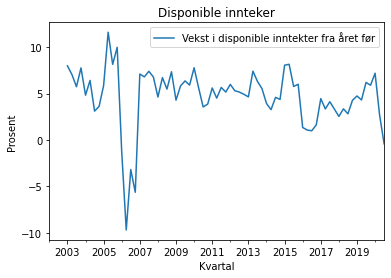

In [48]:
# Fig xx
# df['Disponible inntekter'] = df['Inntekter og utgifter. Sesongjustert (mill kr)']
df['Vekst i disponible inntekter fra året før'].plot()
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Disponible innteker')
plt.legend()
plt.savefig('../Figurer/Makro/99.9 Disp inntekt.png')

<h3>Varekonsumindeksen</h3>

In [49]:
# 1B Varekosumindeksen
url = 'http://www.ssb.no/statbank/sq/10025289/'
df_vki = pd.read_excel(url, skiprows=3, skipfooter=50)


In [51]:
df_vki.index = pd.date_range(start='1/1/2000', end='31/12/2020', freq='M')
# df_vki.drop(df_vki['Unnamed: 0'], axis=1)

df_vki.tail()

,Unnamed: 0,Totalt varekonsum
2020-08-31,2020M08,142.6
2020-09-30,2020M09,148.3
2020-10-31,2020M10,147.0
2020-11-30,2020M11,150.0
2020-12-31,2020M12,148.4


<AxesSubplot:>

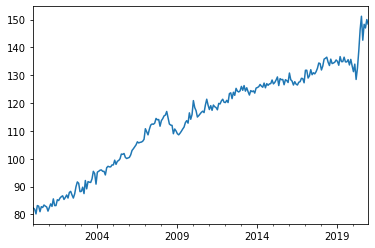

In [52]:
df_vki['Totalt varekonsum'].plot()

<h2>Money market rates and policy rates</h2>

In [23]:
# Money market rates
url = 'https://www.ssb.no/statbank/sq/10033602'
df_nibor = pd.read_excel(url, skiprows=3, skipfooter=56)
df_nibor.rename(columns={'Unnamed: 0':'Dato'}, inplace=True)
# df_nibor.index = df_nibor.Dato
# df_nibor.drop(['Dato'], axis=1, inplace=True)
df_nibor.rename(columns = {'NIBOR (3 mnd. effektiv)': 'Nibor 3M', 'Norges Banks foliorente (styringsrenten)':'FOLIO'}, inplace=True)

In [24]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_nibor['DatoM'] = df_nibor['Dato'].astype('category')
df_nibor['DatoM'] = df_nibor['DatoM'].str.replace('M', '-')                     
df_nibor['date']=pd.to_datetime(df_nibor['DatoM']).dt.to_period('M')

In [25]:
df_nibor.index = df_nibor.date
df_nibor.drop(['DatoM', 'date', 'Dato'], axis=1, inplace=True)

In [26]:
df_nibor.tail()

,Nibor 3M,FOLIO
date,,
2020-10,0.45,0.0
2020-11,0.37,0.0
2020-12,0.50,0.0
2021-01,0.49,0.0
2021-02,0.46,0.0


In [27]:
# df['FOLIO'].head(10)

In [28]:
df_nibor.to_pickle('../dfnibor.pkl')

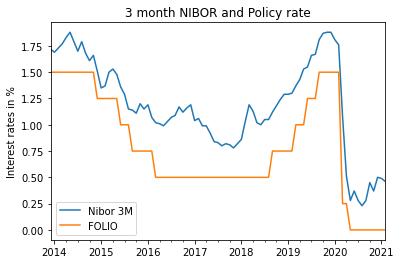

In [30]:

df_nibor.plot()
plt.title('3 month NIBOR and Policy rate')
plt.ylabel('Interest rates in %')
plt.xlabel("")
plt.savefig('2.0 NIBOR.png')

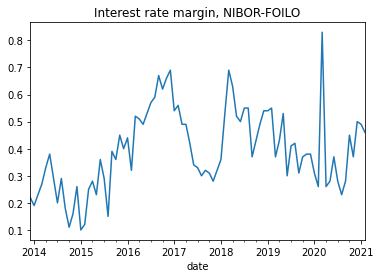

In [32]:
# Interest rate margin
plt.clf()
plt.title("Interest rate margin, NIBOR-FOILO")
df_nibor["MARGIN"]=df_nibor["Nibor 3M"]-df_nibor["FOLIO"]


df_nibor["MARGIN"].plot()
#df['FOLIO'].plot()
plt.savefig('../Figurer/Makro/2.2 Rentemargin.png')
plt.show()


<h2> Mortgage loan rates </h2>
<p> Average over Norwegian Banks <br>
Source: Statistics Norway </p>


In [36]:
# 10738: Renter på nye nedbetalingslån, etter utlånstype, sektor og bindingstid. Utvalg av banker og kredittforetak (prosent)
url = 'https://www.ssb.no/statbank/sq/10033653'
df_renter = pd.read_excel(url, skiprows=4, skipfooter=49)
df_renter.rename(columns = {'Unnamed: 0':'Date', 'Nedbetalingslån med pant i bolig':'Mortgage loan rates'}, inplace=True)

# Uncomment hvis en skal lage figur med dato (eller plasser etter endring til datetime)
# df_renter.index = df_renter.Dato
# df_renter.drop(columns=['Dato'], inplace=True)

In [42]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_renter['DatoM'] = df_renter['Date'].astype('category')
df_renter['DatoM'] = df_renter['DatoM'].str.replace('M', '-')                     
# Endrer til DateTime og periode ÅÅÅÅ-MM:
df_renter['date']=pd.to_datetime(df_renter['DatoM']).dt.to_period('M')


df_renter.index = df_renter.date
df_renter.drop(columns=['Date','date', 'DatoM'], inplace=True)

In [43]:
df_renter.head()

,Mortgage loan rates
date,
2013-12,4.05
2014-01,4.04
2014-02,4.03
2014-03,4.02
2014-04,4.01


In [49]:
print(df_renter.head(), df_renter.tail())

         Nedbetalingslån med pant i bolig
date                                     
2013-12                              4.05
2014-01                              4.04
2014-02                              4.03
2014-03                              4.02
2014-04                              4.01          Nedbetalingslån med pant i bolig
date                                     
2020-05                              2.02
2020-06                              1.97
2020-07                              1.95
2020-08                              1.94
2020-09                              1.92


<AxesSubplot:xlabel='date'>

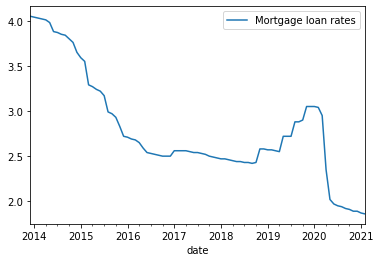

In [44]:
df_renter.plot()

In [46]:
# Merge data: Nibor/policy rate and mortgage rates

df_renters = df_nibor.merge(df_renter, left_on='date', right_on='date')


In [52]:
# df_renters

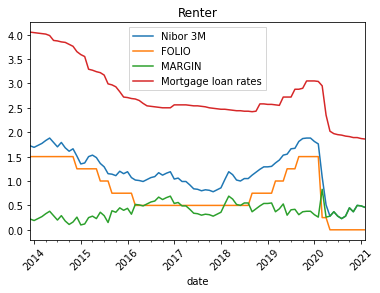

In [47]:
df_renters.plot()
plt.xticks(rotation=45)

# plt.xlabel(rotate='45')
plt.title('Renter')
plt.legend( fancybox=False )
plt.savefig('../Figurer/Makro/renter.png')
plt.show()

In [54]:
df_renters.corr()
df_renters.head()

,Nibor 3M,FOLIO,MARGIN,Nedbetalingslån med pant i bolig
date,,,,
2013-12,1.72,1.5,0.22,4.05
2014-01,1.69,1.5,0.19,4.04
2014-02,1.73,1.5,0.23,4.03
2014-03,1.77,1.5,0.27,4.02
2014-04,1.83,1.5,0.33,4.01


# Credit markets
* https://www.ssb.no/kredind

In [53]:
url = 'https://www.ssb.no/statbank/sq/10042059'  # sesongjusterte tall
# url = 'https://www.ssb.no/statbank/sq/10046976'  # ujusterte tall

In [54]:
df_k2 = pd.read_excel(url, skiprows=350, skipfooter=52, header=None, names = ['date', 'households', 'companies'])

df_k2.index = df_k2['date']
df_k2.drop(['date'], axis= 1, inplace=True)

df_k2['Dlog_K2'] = np.log(df_k2['households']).diff()*100
df_k2['Dlog_K2_12'] = np.log(df_k2['households']).diff(12)*100


In [56]:
df_k2.tail(5)
# df_k2.head()

,households,companies,Dlog_K2,Dlog_K2_12
date,,,,
2020M10,1924052,3774528,0.444843,3.544848
2020M11,1921851,3795848,-0.114459,3.397761
2020M12,1923109,3808376,0.065436,3.877643
2021M01,1930836,3824959,0.400992,3.643670
2021M02,1945610,3838251,0.762248,3.778269


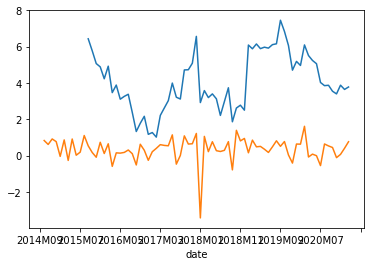

In [57]:
df_k2['Dlog_K2_12'].plot()
df_k2['Dlog_K2'].plot()
plt.show()


<h2>Konsumpriser</h2>

In [74]:
# KPI og KPI-JAE 
url= 'http://www.ssb.no/statbank/sq/10017630/'

kpi_df = pd.read_excel(url, skiprows=220, skipfooter=82, header=None, names=['Dato', 'KPI', 'KPI-JAE'])
# header = kpi_df.iloc[0]

# header[0]='Dato'
# header[1]='KPI'
# header[2] = 'KPI-JAE'
# # kpi_df = kpi_df[1:] #take the data less the header row
# kpi_df.columns = header

kpi_df.index=kpi_df['Dato']
kpi_df.drop(['Dato'], axis=1, inplace=True)

kpi_df['Dlog_KPI'] = np.log(kpi_df['KPI']).diff()
kpi_df['Dlog_KPI-JAE'] = np.log(kpi_df['KPI-JAE']).diff()
# .astype('int')


#  df.rename(index=str, columns={"A": "a", "B": "c"})

In [75]:
kpi_df['KPI'].dtype

dtype('float64')

In [76]:
kpi_df.head()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE
Dato,,,,
2003M01,81.9,82.6,NaN,NaN
2003M02,81.8,82.8,-0.001222,0.002418
2003M03,81.0,82.7,-0.009828,-0.001208
2003M04,80.5,82.7,-0.006192,0.000000
2003M05,80.1,82.8,-0.004981,0.001208


In [77]:
kpi_df['log_KPI'] = np.log(kpi_df['KPI'].astype('float'))
kpi_df['log_KPI-JAE'] = np.log(kpi_df['KPI-JAE'].astype('float'))

kpi_df['Dlog_KPI'] = kpi_df['log_KPI'].diff()
kpi_df['Dlog_KPI-JAE'] = kpi_df['log_KPI-JAE'].diff()

kpi_df['DKPI'] = kpi_df['Dlog_KPI']*100
kpi_df['DKPI-JAE'] = kpi_df['Dlog_KPI-JAE']*100

In [78]:
# header
kpi_df.tail()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE,log_KPI,log_KPI-JAE,DKPI,DKPI-JAE
Dato,,,,,,,,
2020M06,112.0,111.9,0.000000,0.002685,4.718499,4.717606,0.000000,0.268457
2020M07,112.4,112.4,0.003565,0.004458,4.722064,4.722064,0.356507,0.445832
2020M08,112.7,112.8,0.002665,0.003552,4.724729,4.725616,0.266548,0.355240
2020M09,112.7,112.6,0.000000,-0.001775,4.724729,4.723842,0.000000,-0.177462
2020M10,113.0,112.9,0.002658,0.002661,4.727388,4.726502,0.265840,0.266076


In [79]:
kpi_df['KPI-JAE, Trend']=kpi_df['DKPI-JAE'].rolling(window=3).mean()

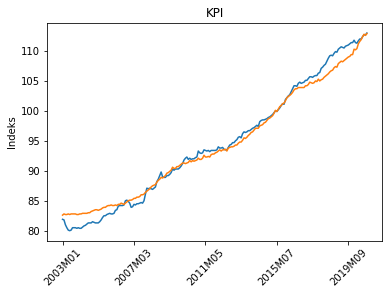

In [80]:
import datetime
now = datetime.datetime.now()

plt.clf()

# print("Current date and time using str method of datetime object")
# print(str(now))
# print("Current date and time using strftime")
# today=now.strftime("%Y-%d-%m")
# print(today)

kpi_df['KPI'].plot()
kpi_df['KPI-JAE'].plot()
plt.title('KPI')
plt.ylabel('Indeks')
plt.xticks(rotation=45)
plt.xlabel("")
# plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
#            ncol=4, mode="expand", borderaxespad=0., fancybox=False )
plt.savefig('../Figurer/Makro/KPI.png')
plt.show()


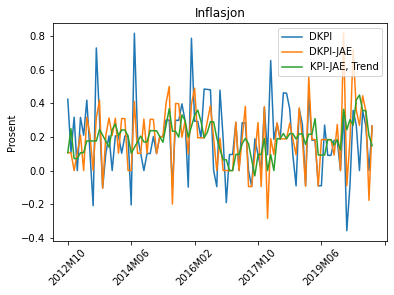

In [81]:
kpi_df['DKPI']['2012M10':].plot()
kpi_df['DKPI-JAE']['2012M10':].plot()
kpi_df['KPI-JAE, Trend']['2012M10':].plot()
plt.title('Inflasjon')
plt.ylabel('Prosent')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("")
# plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
#            ncol=4, mode="expand", borderaxespad=0., fancybox=False )
plt.savefig('../Figurer/Makro/DKPI.png')
plt.show()


In [82]:
df.to_pickle('../df_nibor.pkl')

In [83]:
start= 'StartPeriod=2011'
url = 'https://data.norges-bank.no/api/data/EXR/B.USD+GBP+EUR.NOK.SP?'+start+'&format=csv-:-comma-true-y'

col_names = ['Dato','EURNOK', 'GBPNOK','USDNOK' ]
df = pd.read_csv(url, sep = ',', names=col_names, header=None)

df = df[9:]
# pd.to_numeric(df['EURNOK'], errors='ignore')

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

# valuta=['GBPNOK','EURNOK','USDNOK']
# df[valuta].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes


EURNOK    float64
GBPNOK    float64
USDNOK    float64
dtype: object

In [84]:
df.tail()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2020-11-09,10.7101,11.8706,9.0130
2020-11-10,10.6618,11.9550,9.0293
2020-11-11,10.6773,12.0057,9.0747
2020-11-12,10.7658,11.9933,9.1305
2020-11-13,10.8123,12.0561,9.1513


In [85]:
df.to_pickle('../dfvalutaEur.pkl')


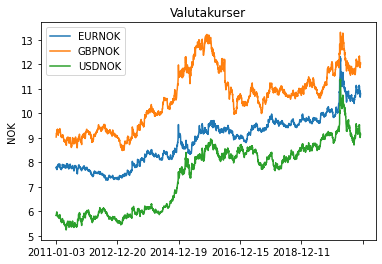

In [86]:
#3 valuta (jeg lager to plot fra denne kategorien for tilpasse størrelsesorden)

df.plot()
plt.xlabel('')
plt.ylabel('NOK')
plt.title('Valutakurser')
plt.savefig('../Figurer/Makro/3.1 valuta.png')


In [87]:
df.head()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2011-01-03,7.7800,9.033,5.8286
2011-01-04,7.8090,9.093,5.8185
2011-01-05,7.7895,9.182,5.8953
2011-01-06,7.7475,9.174,5.9182
2011-01-07,7.7260,9.216,5.9610


In [88]:
start= 'StartPeriod=2011'
valutaer = 'SEK+TWI+I44'

url = 'https://data.norges-bank.no/api/data/EXR/B.'+valutaer+'.NOK.SP?'+start+'&format=csv-:-comma-true-y'


StartPeriod=2011


col_names = ['Dato', 'I44','SEK','KKI' ]



In [89]:
df = pd.read_csv(url, sep = ',' , names=col_names, header=None)

df = df[9:]

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

valutaer = ['SEK','KKI','I44' ]
df[valutaer].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes

I44    float64
SEK    float64
KKI    float64
dtype: object

In [90]:
# df.head()

<Figure size 432x288 with 0 Axes>

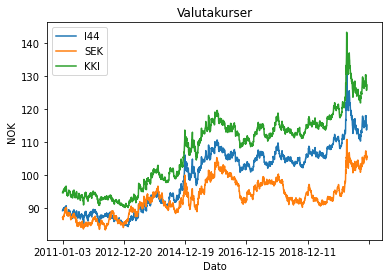

In [91]:
plt.clf()
#3.2 valuta
df.plot()
plt.ylabel('NOK')
plt.title('Valutakurser')
plt.savefig('../Figurer/Makro/3.2 valuta.png')


C:\Users\i235jbp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2877: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


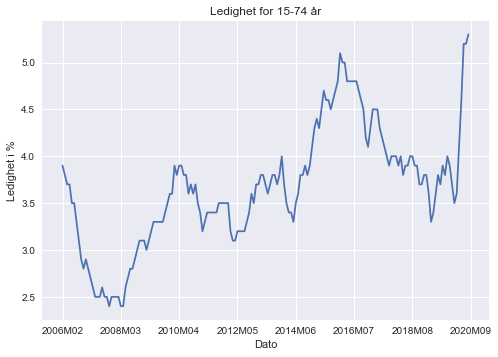

In [97]:
plt.clf()
#4 ledighet
dfaku = pd.read_csv('http://data.ssb.no/api/v0/dataset/1054.csv?lang=en', names = ['sex', 'age','contents', 'time', 'value'], header = 0)

#cleaning
for i in range(len(dfaku['value'])):
    #df['value'][i] = str(df['value'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
    dfaku['value'][i] = str(dfaku['value'][i]).replace('..','NaN') # change '..' to 'NaN'
    if dfaku['value'][i] == '.' or dfaku['value'][i] == '0':# find missing values as replace with 'NaN'
        dfaku['value'][i] = 'NaN'
        
        
series = pd.Series(dfaku['value'].astype(np.float64))
series.index = [dfaku[dfaku.columns[i]] for i in range(4)]
l = series.index.levels

series[l[0][0], l[1][1], l[2][14]].plot()
plt.xlabel('Dato')
plt.ylabel('Ledighet i %')
plt.title('Ledighet for 15-74 år')
plt.savefig('../Figurer/Makro/4 ledighet.png')




In [98]:
dfaku.to_pickle('../dfaku.pkl')


In [99]:
df_ = dfaku[dfaku['contents']=='Unemployment rate (LFS), seasonally adjusted']
df__ = df_[df_['age']=='15-74 15-74 years']
df_ = df__[df__['sex']=='0 Both sexes']
# df_


In [101]:
df_aku = df_['value'].astype('float')
df_aku.index = pd.date_range(start='28/02/2006', end='30/09/2020', freq='M')

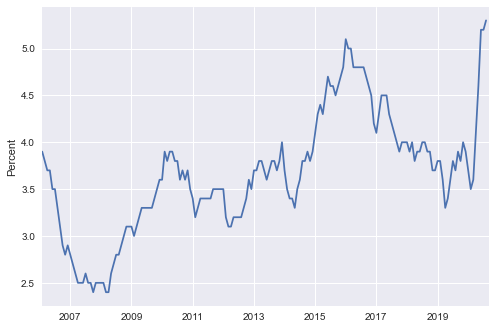

In [102]:
plt.style.use('seaborn')
df_aku['2006':].plot()
plt.ylabel('Percent')
plt.savefig('Unemployment.png')
plt.show()
plt.style.use('default')

In [103]:
# Ledige stillinger
# url=http://www.ssb.no/statbank/sq/10017461/
    
    

In [16]:
# Dagpengemottakere
# https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger
url = 'https://www.nav.no/_/attachment/download/c7c4abe6-f040-4014-93f3-eea1145f1bf2:d306a7f2712590e637d9e463f82edc31d12fd4d5/200421%20S%C3%B8knader_om_dagpenger_2021_uke_15.xlsx'
# næringser 
# url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger/_/attachment/download/45180f2d-4445-4f83-834e-5d8c95d2bf90:120845241b1ca3a76ab8d6b47559f543a743e4f8/2503%20-%20S%C3%B8knader_om_dagpenger._N%C3%A6ring.xlsx'
df_adpm = pd.read_excel(url, skiprows=8, header=None)
df_adpm.drop(columns =[0, 5, 6, 7, 8], inplace=True)
df_adpm.columns=['Date', 'Applications', 'Unemployed', 'Redundants']

df_adpm.index=df_adpm['Date']
df_adpm.drop(columns=['Date'], inplace=True)


In [17]:
df_adpm.head()

,Applications,Unemployed,Redundants
Date,,,
2021-04-17,189,106,83
2021-04-16,590,307,283
2021-04-15,719,385,334
2021-04-14,759,337,422
2021-04-13,888,413,475


In [22]:
df_adpm.sort_values('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

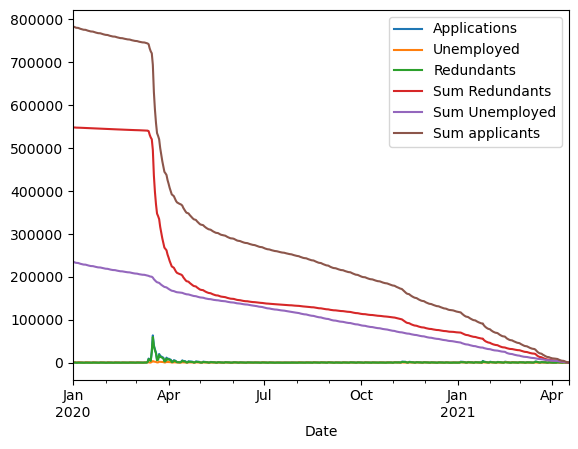

In [23]:
df_adpm.plot()

In [24]:
df_adpm['Sum Redundants'] = df_adpm['Redundants'].cumsum()
df_adpm['Sum Unemployed'] = df_adpm['Unemployed'].cumsum()
df_adpm['Sum applicants'] = df_adpm['Sum Redundants']+ df_adpm['Sum Unemployed']

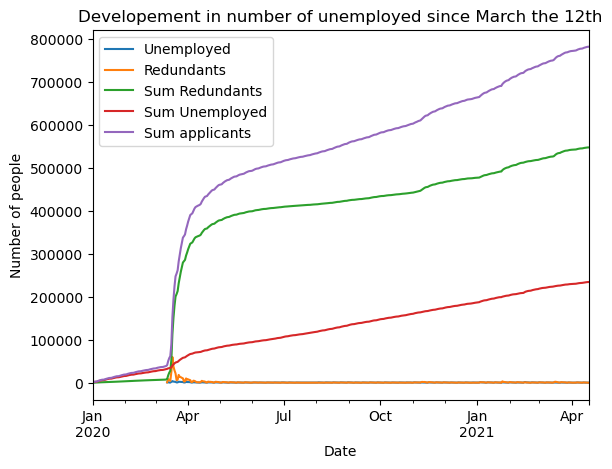

In [25]:
plt.style.use('default')
df_adpm['Unemployed']['03-12-2020':].plot()
df_adpm['Redundants']['03-12-2020':].plot()
df_adpm['Sum Redundants'].plot()
df_adpm['Sum Unemployed'].plot()
df_adpm['Sum applicants'].plot()

plt.legend()
plt.ylabel('Number of people')
plt.title('Developement in number of unemployed since March the 12th')
plt.savefig('../Figurer/Makro/ledigeCovid.png')
plt.show()

In [115]:
# NAV og ant arbeidsledige
url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/ukentlig-statistikk-over-arbeidsledige/_/attachment/download/301ce315-1ba3-4ac6-b7d2-4b1dedb97e12:932ed3002f295f2749da05ecbea10cb5a3326e6f/1011%20Hovedtall%20om%20arbeidsmarkedet.%20Uke%2046.xlsx'
df_adpmN = pd.read_excel(url, skiprows=1 , skipfooter=10)

In [116]:
df_adpmN.head()

,Unnamed: 0,Kilde: NAV,Hovedtall om arbeidsmarkedet. Uke,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Om statistikken,NaN,NaN


In [58]:
#5 boligpris 
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/1060.csv?lang=no', encoding = 'latin1', dtype = object, delimiter = ';')
df.columns = ['region', 'boligtype', 'tid', 'statistikkvariabel', 'prisindeks']
#df['Totalt'] = df['TOTAL Hele landet']

for i in range(len(df['tid'])):
    df['tid'][i] = df['tid'][i][:4] + 'Q' + df['tid'][i][5] #change 'K' to 'Q' in for quarter
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace('..','NaN') # change '..' to 'NaN'
    if df['prisindeks'][i] == '.' or df['prisindeks'][i] == '0':# find missing values as replace with 'NaN'
        df['prisindeks'][i] = 'NaN'


#reorginaze data in a Series with text variables as multilayered indexes
series = pd.Series(df['prisindeks'].astype(np.float64))#, index = [df[df.columns[i]] for i in range(4)])
series.index = [df[df.columns[i]] for i in range(4)]






In [59]:
# dfbolig =df
df.to_pickle('../dfbolig.pkl')


In [60]:
df[df['boligtype']=="00 Boliger i alt"].sample(20)

,region,boligtype,tid,statistikkvariabel,prisindeks
2015,002 Stavanger,00 Boliger i alt,2009Q4,"Prisindeks for brukte boliger, sesongjustert",82.7
3895,004 Trondheim,00 Boliger i alt,2010Q4,"Prisindeks for brukte boliger, sesongjustert",74.3
1040,001 Oslo med Bærum,00 Boliger i alt,2005Q1,Prisindeks for brukte boliger,51.2
1937,002 Stavanger,00 Boliger i alt,2000Q1,"Prisindeks for brukte boliger, sesongjustert",NaN
6732,007 Innlandet,00 Boliger i alt,2014Q3,Prisindeks for brukte boliger,93.9
10315,011 Nord-Norge,00 Boliger i alt,1994Q2,"Prisindeks for brukte boliger, sesongjustert",NaN
7490,008 Agder og Rogaland uten Stavanger,00 Boliger i alt,1992Q2,Prisindeks for brukte boliger,NaN
1001,001 Oslo med Bærum,00 Boliger i alt,2000Q1,"Prisindeks for brukte boliger, sesongjustert",NaN
9534,010 Trøndelag uten Trondheim,00 Boliger i alt,2013Q4,Prisindeks for brukte boliger,90.3
205,TOTAL Hele landet,00 Boliger i alt,2017Q3,"Prisindeks for brukte boliger, sesongjustert",111.4


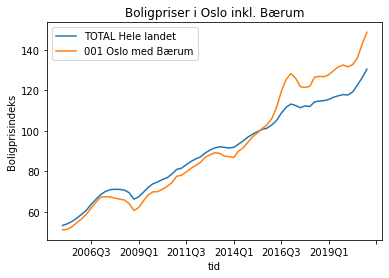

In [61]:

#5.1 boligpris i oslo og bærum
liste = ['TOTAL Hele landet','001 Oslo med Bærum' ]
for i in liste:
    series[i,'00 Boliger i alt',  :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)
plt.legend()
plt.ylabel('Boligprisindeks')
plt.title('Boligpriser i Oslo inkl. Bærum')
plt.savefig('../Figurer/Makro/5.1 boligpris oslo og landet.png')




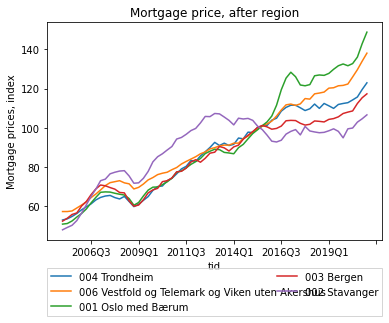

In [63]:
plt.clf()

#5.2 boligprisindeks regioner
# for i in series.index.levels[0][1:-1]:
#     series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2004Q1':].plot(label = i)    
    
    
plt.legend(bbox_to_anchor=(0., -0.35, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.ylabel('Mortgage prices, index')
plt.title('Mortgage price, after region')
plt.savefig('../Figurer/Makro/5.2 boligprisindeks regioner.png')




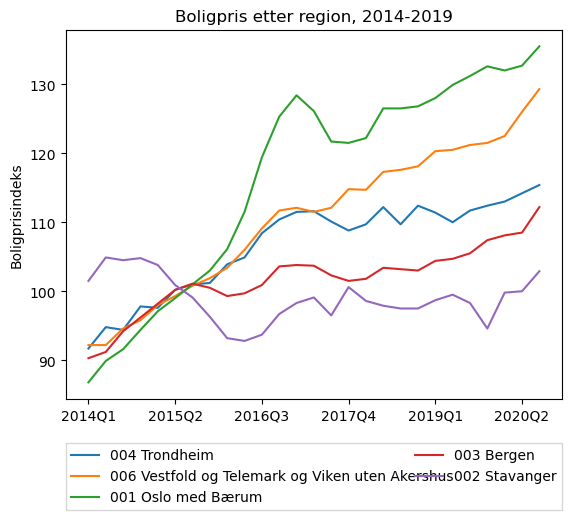

In [122]:

#5.22 boligprisindeks regioner
plt.clf()

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2014Q1':].plot(label = i)    
        
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.3, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.xlabel("")
plt.ylabel('Boligprisindeks')
plt.title('Boligpris etter region, 2014-2019')
plt.savefig('../Figurer/Makro/5.22 boligprisindeks regioner.png')
plt.show()

In [183]:
# EUROSTAT-- http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_42D526A3_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
#  Ta ut datasett i excel - ta vare på, chainlinked volume, index=100, season and calender adjusted
# On seperate sheets
#http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_54D3DCA_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
euro_df = pd.read_excel(r"C:\Users\i235jbp\Documents\GitHub\Data\Makro\namq_10_gdp.xls", skiprows=9, nan_values=":", skipfooter=3)

euro_df = euro_df.T

new_header = euro_df.iloc[0] #grab the first row for the header
new_header[0]='Time'
euro_df = euro_df[1:] #take the data less the header row
euro_df.columns = new_header


pd.to_datetime(euro_df['Time'])
euro_df.set_index('Time', inplace=True)


# euro_df["Germany"] = euro_df[]
euro_df.rename({'Euro area - 12 countries (2001-2006)':'Euro area', "Germany (until 1990 former territory of the FRG)": 'Germany'}, axis=1, inplace=True)


euro_df.tail()

Unnamed: 0,European Union - 28 countries (2013-2020),European Union - 15 countries (1995-2004),"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 19 countries (from 2015),Euro area,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina,Kosovo (under United Nations Security Council Resolution 1244/99),Euro area - 18 countries (2014)
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019Q1,3.67259e+06,3.34209e+06,2.66889e+06,2.66889e+06,2.60792e+06,102500,11752.8,47709.5,70651.9,749140,5104.2,73505.5,48155.6,294611,557651,12517.1,405004,5296,5918.5,9577.2,12784.8,31768.3,2686.2,181111,84851.2,123096,47324.4,43497.7,10676.1,:,51080,112500,549901,:,92997.8,127958,:,:,:,9201.3,:,:,:,:
2019Q2,3.67854e+06,3.34579e+06,2.67271e+06,2.67271e+06,2611424,102797,11832.1,47945.5,71506.2,747324,5150.3,73195.4,48650.8,295732,559337,12594.1,405528,5316.7,5960.8,9660.8,13026.2,32087.3,2725.7,181703,84826,123927,47560.6,43888.1,10671.6,:,51361,112758,549025,:,93187.2,128411,:,:,:,9335.5,:,:,:,:
2019Q3,3.69286e+06,3.35728e+06,2680936,2680936,2.61924e+06,103215,11910.6,48150.6,71850.1,748791,5210.9,74711.5,48850.5,296929,560823,12666.5,405801,5344.6,5995.4,9736.8,13059.4,32455.5,2757.9,182463,84869.3,125428,47707.2,44149.3,10754,:,51536,113180,551907,:,93168.6,128952,:,:,:,9544.7,:,:,:,:
2019Q4,3.69826e+06,3.36043e+06,2.68385e+06,2.68385e+06,2621716,103713,12000.7,48374.4,72254.3,749001,5255.3,76093,48514.6,298146,560402,12709.1,404751,5388.4,6003,9840,13117.5,32771.2,2803.5,183174,84900.6,125670,48064.2,44816.3,10798.3,:,51250,113358,552017,:,94641.5,129356,:,:,:,9705.3,:,:,:,:
2020Q1,:,3231233,2.58115e+06,2.58115e+06,2.52092e+06,:,:,:,:,:,:,:,:,282532,527715,:,385527,:,:,9817.2,:,:,:,:,82785.9,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:


In [196]:
euro_df.to_pickle('../dfeuro.pkl')
print('Fransk BNP-fall',((527715-560402)/560402*100))

Fransk BNP-fall -5.832777184949375


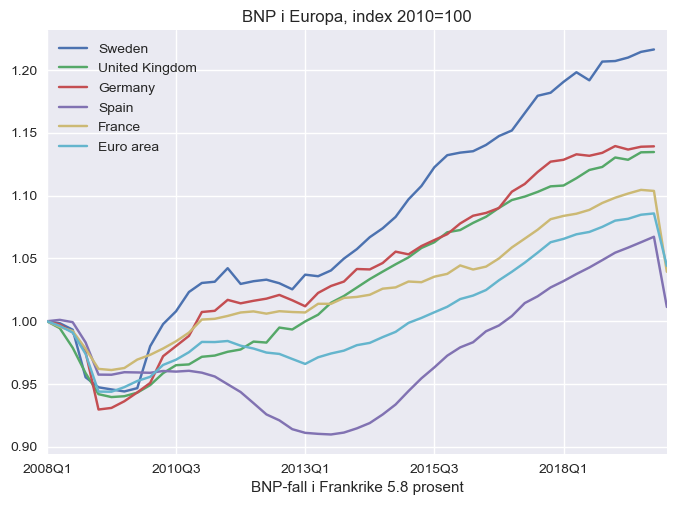

In [197]:

# Figur 6.1  BNP fra Eurostat
plt.clf()

(euro_df['Sweden']['2008Q1':'2019Q4']/euro_df['Sweden']['2008Q1']).plot()
(euro_df['United Kingdom']['2008Q1':'2019Q4']/euro_df['United Kingdom']['2008Q1']).plot()
(euro_df['Germany']['2008Q1':'2019Q4']/euro_df['Germany']['2008Q1']).plot()
(euro_df['Spain']['2008Q1':'2020Q1']/euro_df['Spain']['2008Q1']).plot()
(euro_df['France']['2008Q1':'2020Q1']/euro_df['France']['2008Q1']).plot()
(euro_df['Euro area']['2008Q1':'2020Q1']/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i Europa, index 2010=100")
plt.legend()
plt.xlabel('BNP-fall i Frankrike 5.8 prosent')
plt.savefig('../Figurer/Makro/6.1 bnp euroområdet.png')
plt.show()

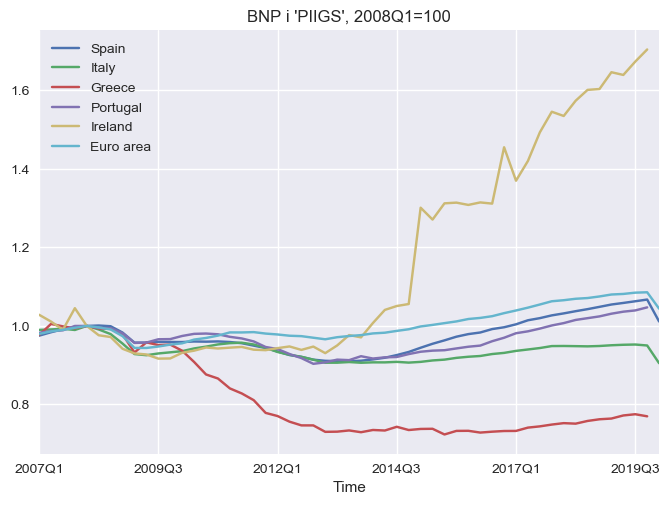

In [200]:

plt.clf()
# FIG 6.2 PIIGS
(euro_df['Spain']['2006Q1':'2020Q1']/euro_df['Spain']['2008Q1']).plot()
(euro_df["Italy"]['2006Q1':'2020Q1']/euro_df["Italy"]['2008Q1']).plot()
(euro_df["Greece"]['2006Q1':'2019Q4']/euro_df["Greece"]['2008Q1']).plot()
(euro_df["Portugal"]['2006Q1':'2019Q4']/euro_df["Portugal"]['2008Q1']).plot()
(euro_df["Ireland"]['2006Q1':'2019Q4']/euro_df["Ireland"]['2008Q1']).plot()
(euro_df['Euro area']['2006Q1':'2020Q1']/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i 'PIIGS', 2008Q1=100")
plt.legend()
plt.savefig('../Figurer/Makro/6.2 bnp PIIGS.png')
plt.show()
# PIIGS - opprinnelig uten italia, men ser at det er den første I'en som går bra og Italia er fortsatt ikke over 2008-nivå, 
# Irland går derimot helt fantastisk - GAFA har boosted BNP??

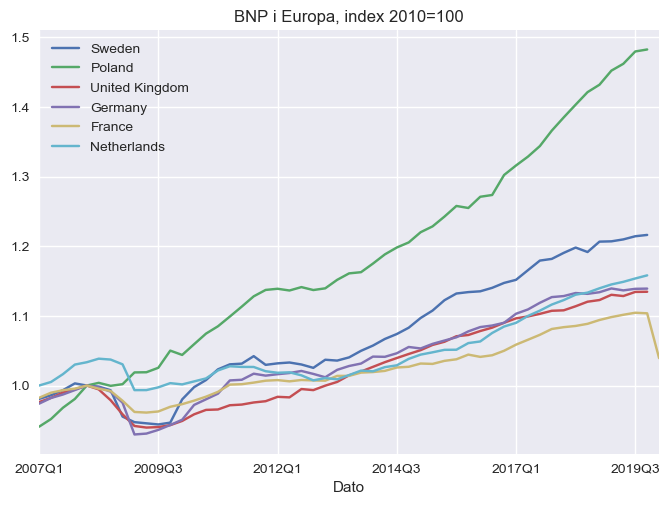

<Figure size 800x550 with 0 Axes>

In [204]:

plt.clf()
(euro_df['Sweden']['2007Q1':'2019Q4']/euro_df['Sweden']['2008Q1']).plot()
(euro_df['Poland']['2007Q1':'2019Q4']/euro_df['Poland']['2008Q1']).plot()
(euro_df['United Kingdom']['2007Q1':'2019Q4']/euro_df['United Kingdom']['2008Q1']).plot()
(euro_df['Germany']['2007Q1':'2019Q4']/euro_df['Germany']['2008Q1']).plot()
(euro_df['France']['2007Q1':'2020Q1']/euro_df['France']['2008Q1']).plot()
(euro_df['Netherlands']['2007Q1':'2019Q4']/euro_df['Netherlands']['2007Q1']).plot()
plt.title("BNP i Europa, index 2010=100")

plt.legend()
plt.xlabel('Dato')
plt.show()
plt.savefig('6.3 bnp euroområdet.png')

In [205]:

# http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-055624_QID_2DC4BB93_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;S_ADJ,L,Z,0;AGE,L,Z,1;UNIT,L,Z,2;SEX,L,Z,3;INDICATORS,C,Z,4;&zSelection=DS-055624SEX,T;DS-055624UNIT,PC_ACT;DS-055624S_ADJ,SA;DS-055624AGE,TOTAL;DS-055624INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=S-ADJ_1_2_-1_2&rankName6=TIME_1_0_0_0&rankName7=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23

# euroU_df = pd.read_csv(r'C:\Users\i235jbp\Documents\GitHub\une_rt_m.xls',na_values = ':',)
euroU_df = pd.read_excel(r'C:/Users/i235jbp/Documents/GitHub/Data/Makro/une_rt_m.xls', skiprows=10, skipfooter =3, na_values = ':',)
euroU_df = euroU_df.T
header = euroU_df.iloc[0]
header[0]='TIME'
header[11] = 'Germany'

euroU_df = euroU_df[1:]
euroU_df.columns = header
# pd.to_datetime(euroU_df['TIME'])
euroU_df.set_index('TIME', inplace=True)


# euroU_df = euroU_df[euroU_df["S_ADJ"]=="Seasonally adjusted data, not calendar adjusted data"]
# euroU_df = euroU_df[euroU_df["UNIT"]=="Percentage of active population"]
# #dfses.drop('statistikkvariabel',1, inplace=True)
# euroU_df.drop(["UNIT","S_ADJ", "TIME", "SEX", "AGE"], 1, inplace=True)
# #dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = 'Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')
# euroU_df['Value'] = euroU_df['Value'].astype('float64')
# euroU_df = euroU_df.pivot(columns = 'GEO', values="Value")

euroU_df.head()


Unnamed: 0,European Union - 28 countries (2013-2020),European Union - 25 countries (2004-2006),"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 19 countries (from 2015),Euro area - 18 countries (2014),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Germany,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Turkey,United States,Japan,EU27
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005M01,9.1,9.1,9,9.2,9.1,8.3,11.2,8.2,5.3,10.7,9.2,4.4,10.1,10.1,8.7,13.6,7.7,4.9,11.3,9.8,4.8,6.6,6.7,5.9,5.4,18.1,8.3,7.8,6.4,17.3,8.7,7,4.7,2.9,4.5,9.3,5.3,4.5,NaN
2005M02,9.1,9.1,9,9.2,9.2,8.5,10.9,8.1,5.2,10.9,9.3,4.3,10,9.9,8.7,13.5,7.9,5,11,9.5,4.8,6.8,6.9,6,5.4,18.2,8.4,8,6.5,17.1,8.6,7.8,4.6,2.8,4.4,9.1,5.4,4.6,NaN
2005M03,9.1,9.1,9.1,9.2,9.2,8.6,10.6,8,5.2,10.9,8.6,4.5,10.1,9.7,8.7,13.5,7.8,5.2,10.7,9.3,4.7,6.9,7.2,6,5.5,18.3,8.5,7.9,6.4,17,8.5,7.3,4.6,2.7,4.6,9.3,5.2,4.5,NaN
2005M04,9.1,9.2,9.1,9.2,9.2,8.4,10.4,8,5.2,11.2,8.3,4.8,10,9.7,8.8,13.3,7.9,5.4,10.2,9.3,4.7,7.1,7.4,6,5.6,18.4,8.7,7.2,6.1,16.7,8.4,7.6,4.7,2.7,4.6,9.5,5.2,4.5,NaN
2005M05,9.1,9.1,9.1,9.2,9.2,8.6,10.1,7.8,5,11.2,8,4.9,10,9.4,8.9,13.3,7.6,5.8,10.1,9,4.7,7.2,7.3,6,5.8,18.4,8.6,7.3,6,16.6,8.4,7.9,4.7,2.6,4.6,9.7,5.1,4.5,NaN


In [207]:
euroU_df.tail()

Unnamed: 0,European Union - 28 countries (2013-2020),European Union - 25 countries (2004-2006),"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 19 countries (from 2015),Euro area - 18 countries (2014),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Germany,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Turkey,United States,Japan,EU27
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019M12,6.1,6.2,7.3,7.3,7.3,5.2,4.2,1.9,4.9,3.2,4.4,4.7,16.4,13.7,8.2,6.3,9.6,6.3,6.4,6.4,5.6,3.4,3.3,3.2,4.2,2.9,6.7,4,3.8,5.6,6.6,6.6,3.7,3.6,3.9,13.1,3.5,2.2,NaN
2020M01,6.1,6.2,7.3,7.3,7.3,5.2,4.1,2,4.8,3.2,4.7,4.9,16.2,13.8,8.1,6.3,9.5,5.9,6.5,6.6,5.6,3.4,3.4,3,4.3,2.9,6.8,3.9,3.7,5.4,6.6,7.2,3.8,3.8,3.7,12.6,3.6,2.4,NaN
2020M02,NaN,6.2,7.3,7.3,7.3,5.2,4,1.9,4.8,3.4,4.7,4.8,16.1,13.6,7.9,6.2,9.3,5.8,6.5,6.6,5.7,3.6,3.4,2.9,4.5,3,6.4,3.9,3.6,5.5,6.5,7.5,NaN,3.8,3.5,NaN,3.5,2.4,NaN
2020M03,NaN,6.3,7.4,7.4,7.4,5.3,4.5,2,4.8,3.5,NaN,5.3,NaN,14.5,8.4,6.8,8.4,6.7,6.9,7.1,6.5,NaN,3.5,2.9,4.5,3,NaN,4.6,3.8,5.6,6.5,6.7,NaN,NaN,NaN,NaN,4.4,2.5,NaN
2020M04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


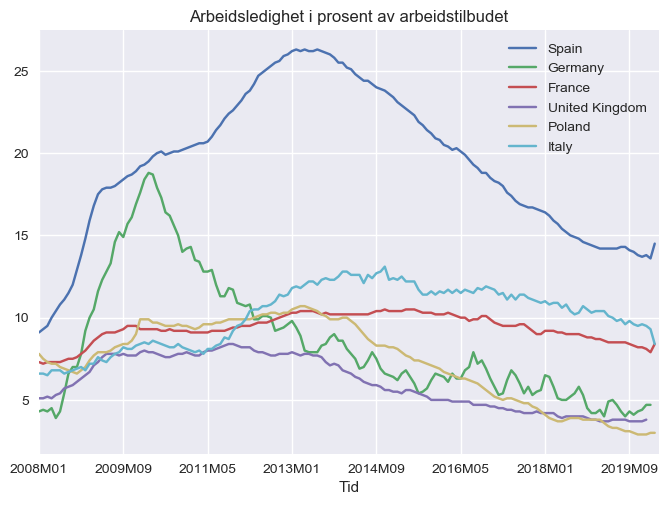

In [208]:
plt.clf()
euroU_df["Spain"]["2007Q1":].plot()
euroU_df["Germany"]["2007Q1":].plot()
euroU_df["France"]["2007Q1":].plot()
euroU_df["United Kingdom"]["2007Q1":].plot()
euroU_df["Poland"]["2007Q1":].plot()
euroU_df["Italy"]["2007Q1":].plot()
plt.title("Arbeidsledighet i prosent av arbeidstilbudet")
plt.legend()
plt.xlabel("Tid")
plt.savefig('../Figurer/Makro/ledighetEuro.png')
plt.show()

In [216]:
# US renter 
# # Treasury bills
# fsb_url = "https://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&series=efc162fd6c9e30df971fc84ad58a07dd&lastobs=100&from=&to=&filetype=spreadsheetml&label=include&layout=seriescolumn"
# # 3-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar 
# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/FRB_3mnd10år_2019februar.xlsx", header = None, skiprows=7, missing = "ND")
fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/Data/Makro/FRB_H15.xlsx", header = None, skiprows=7, missing = "ND")

fsb_df.columns = ["Dato",'12mnth action rate','composite yield 10 yrs' ,'3mnth auction bill rate', "LIBOR","T-bill" ,"T-bill-1year","Treasury3year","Treasury10year"]
pd.to_datetime(fsb_df['Dato'])
fsb_df.index = fsb_df.Dato
#fsb_df.drop("Dato", inplace=True)





In [219]:
fsb_df.tail()


,Dato,12mnth action rate,composite yield 10 yrs,3mnth auction bill rate,LIBOR,T-bill,T-bill-1year,Treasury3year,Treasury10year
Dato,,,,,,,,,
2019-12,2019-12,NaN,NaN,NaN,NaN,1.54,1.51,1.63,1.86
2020-01,2020-01,NaN,NaN,NaN,NaN,1.52,1.49,1.52,1.76
2020-02,2020-02,NaN,NaN,NaN,NaN,1.52,1.37,1.31,1.50
2020-03,2020-03,NaN,NaN,NaN,NaN,0.29,0.32,0.50,0.87
2020-04,2020-04,NaN,NaN,NaN,NaN,0.14,0.18,0.28,0.66


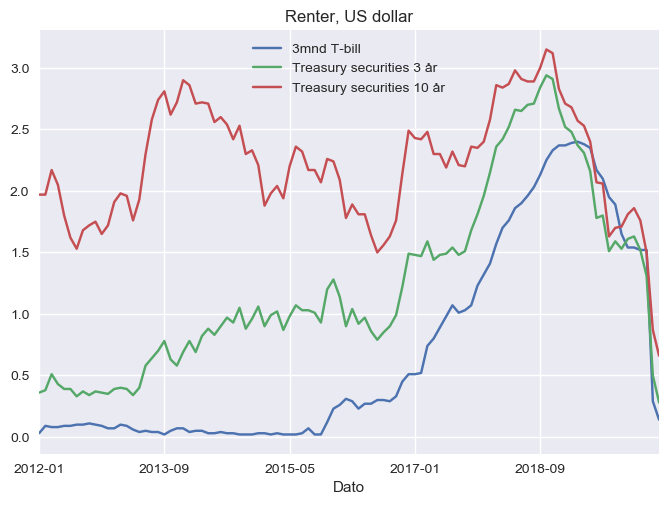

In [218]:
# Figur 7.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fsb_df["T-bill"].plot(label="3mnd T-bill")
# fsb_df["LIBOR"].plot(label="LIBOR")
fsb_df["Treasury3year"].plot(label="Treasury securities 3 år")
fsb_df["Treasury10year"].plot(label="Treasury securities 10 år")
plt.title("Renter, US dollar")
plt.legend()
plt.savefig('../Figurer/Makro/7.1 US renter.png')


In [220]:
pd.to_datetime(fsb_df['Dato'])
fsb_df['Dato'] = fsb_df['Dato'].datetime.strptime("%Y-%m").strftime("%Y-%m-%d")
fsb_df['2014-02-07':].head()
# fsb_df.tail()

AttributeError: 'Series' object has no attribute 'datetime'

In [ ]:
fsb_df.to_pickle('../dffsb.pkl')


In [222]:

# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156N.xls', skiprows=10)
fred_df.columns = ["Dato", "LIBOR"]


fred_df.ffill() # får ikke denne til å fungere
fred_df.index = fred_df.Dato

fred_df.dropna(inplace=True)

# for å ta bort nullere som oppstår pga bank holidays
# fred_df=fred_df[fred_df>0.0]

In [224]:
fred_df.tail()

,Dato,LIBOR
Dato,,
2019-02-01,2019-02-01,2.73263
2019-02-04,2019-02-04,2.73438
2019-02-05,2019-02-05,2.73850
2019-02-06,2019-02-06,2.73763
2019-02-07,2019-02-07,2.69700


In [ ]:
fred_df_m = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156NM.xls', skiprows=10)
fred_df_m.columns = ["Dato", "LIBOR"]

pd.to_datetime(fred_df_m['Dato'])
fred_df_m.index = fred_df_m.Dato

fred_df_m.head()

In [ ]:
# Figur 8.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fred_df["LIBOR"].plot(label="Eurodollar libor")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar")
plt.legend()
plt.savefig('../Figurer/Makro/8.1 Eurodollar LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:

# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
fred_df_m.head()
fsb_df.head()
# nibor_df.head()
# nok_df.head()
# valuta_df.head()
# fsb_df.drop('LIBOR', axis=1, inplace=True)
# renter_df = pd.concat([fred_df, nibor_df, valuta_df], axis=1, join_axes=[fred_df.index])
renter_df = pd.concat([fred_df, valuta], axis=1, join_axes=[fred_df.index])


renter_df.head(8)

In [ ]:
renter_df["LIBOR"].plot(label="Eurodollar libor")
renter_df["T-bill"].plot(label="3mnd T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar og T-bills")
plt.legend()
plt.savefig('8.2 Tbill LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:
# Figur 9.1 norske renter og libor
# plt.clf()
# renter_df['LIBOR'].plot()
# renter_df['NIBOR 3M'].plot()
# renter_df['1 USD'].plot(secondary_y=True)
# plt.title("Renter, NOK/USD, 3M NIBOR og LIBOR")
# plt.legend()


# plt.savefig('renteparitet.png')

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.plot(renter_df['dato'], renter_df['LIBOR'], 'g-')
# ax2.plot(renter_df['dato'], renter_df['1 USD'] )

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

# plt.show()



In [ ]:
# DEV:

# US - contribution to to growth in GDP 
# Net export: https://fred.stlouisfed.org/series/A019RY2Q224SBEA
# Consumption: https://fred.stlouisfed.org/graph/?g=mZP4
# Public consumption: https://fred.stlouisfed.org/graph/?g=mZP7
# Investment: Gross private inventories: https://fred.stlouisfed.org/graph/?g=mZP9
# Investments: Gross private investments: https://fred.stlouisfed.org/graph/?g=mZPb
# Contributions to percent change in real gross domestic product: Gross private domestic investment: Fixed investment: https://fred.stlouisfed.org/graph/?g=mZPd



In [ ]:
# US savings

# fred_url = 
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df_s = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/A072RC1Q156SBEA.xls', skiprows=10)
fred_df_s.columns = ["Dato", "US savings"]
fred_df_s.index = fred_df_s.Dato



In [ ]:
fred_df_s.head()

In [ ]:
# Figur 10.1 - US savings
plt.clf()
fred_df_s["US savings"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Sparerate i USA, husholdninger")
# plt.legend()
plt.savefig('../Figurer/Makro/10.1 US savings.png')
    
plt.show()


In [ ]:
# US debt to GDP

fred_df_debt = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/GFDEGDQ188S.xls', skiprows=10)
fred_df_debt.columns = ["Dato", "USDebtToGDP"]
fred_df_debt.index = fred_df_debt.Dato
fred_df_debt.head()

In [ ]:
# Figur 10.2 - US debt to gdp
plt.clf()
fred_df_debt["USDebtToGDP"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Gjedsgrad i USA, offentlig")
# plt.legend()
plt.savefig('../Figurer/Makro/10.2 US debtratio.png')
    
plt.show()


In [229]:
#  https://www.nve.no/energiforsyning/kraftmarkedsdata-og-analyser/magasinstatistikk/
el_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/Fyllingsgrad.xlsx', skiprows=2)
# fred_df_debt.columns = ["Dato", "USDebtToGDP"]
# fred_df_debt.index = fred_df_debt.Dato
# fred_df_debt.head()


In [230]:
el_df.head()

,Iso_uke,Nåværende år,Min,Median,Maks,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,0.640810,0.426842,0.679188,0.787623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624639,NaN,NaN
1,2,0.639191,0.404336,0.656149,0.755858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605142,NaN,NaN
2,3,0.627861,0.386367,0.629205,0.725133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575437,NaN,NaN
3,4,0.621983,0.363698,0.597440,0.692209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539403,NaN,NaN
4,5,0.604162,0.346099,0.567435,0.671378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504785,NaN,NaN


In [ ]:
# merge year and week column
# el_df['period'] = el_df[['År', 'Uke']].apply(lambda x: ''.join(x), axis=1)
# pd.MultiIndex.from_frame(el_df)
pd.__version__

In [ ]:
# el_df['Hele landet'].plt()
# plt.show()


In [ ]:
df = pd.DataFrame([[11, 22], [13, 23]], columns=['sub_1', 'sub_2'])

# First plot single-header dataframe (headers = ['sub_1', 'sub_2'])
plt.table(cellText=df.round(4).values, cellLoc='center', bbox=[0.225, 1, 0.7, 0.15],
    rowLabels=['  {}  '.format(i) for i in df.index], rowLoc='center',
    rowColours=['silver']*len(df.index), colLabels=df.columns, colLoc='center',
    colColours=['lightgrey']*len(df.columns), colWidths=[0.1]*len(df.columns))

# Then plot a new table with one cell (value = 'main')
plt.table(cellText=[['main']], cellLoc='center', bbox=[0.225, 1.15, 0.7, 0.05],
    cellColours=[['Lavender']])